<a href="https://colab.research.google.com/github/Jhancyamarsingh17/Automated-medical-report-generation-and-classification-/blob/main/EDA_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import tensorflow as tf


In [ ]:
import pandas as pd
import numpy as np
import regex as re
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
report_df= pd.read_csv('/content/gdrive/MyDrive/Data606_Capstone_project_folder/data/indiana_reports.csv')
report_df

,uid,MeSH,Problems,image,indication,comparison,findings,impression
0,1,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.
1,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.
2,3,normal,normal,Xray Chest PA and Lateral,"rib pain after a XXXX, XXXX XXXX steps this XX...",NaN,NaN,"No displaced rib fractures, pneumothorax, or p..."
3,4,"Pulmonary Disease, Chronic Obstructive;Bullous...","Pulmonary Disease, Chronic Obstructive;Bullous...","PA and lateral views of the chest XXXX, XXXX a...",XXXX-year-old XXXX with XXXX.,None available,There are diffuse bilateral interstitial and a...,1. Bullous emphysema and interstitial fibrosis...
4,5,Osteophyte/thoracic vertebrae/multiple/small;T...,Osteophyte;Thickening;Lung,Xray Chest PA and Lateral,Chest and nasal congestion.,NaN,The cardiomediastinal silhouette and pulmonary...,No acute cardiopulmonary abnormality.
...,...,...,...,...,...,...,...,...
3846,3995,Lung/hyperdistention/mild;Diaphragm/bilateral/...,Lung;Diaphragm;Cicatrix;Pulmonary Atelectasis;...,Xray Chest PA and Lateral,"Nausea, vomiting x2 weeks. Dialysis patient.","XXXX, XXXX.",The cardiomediastinal silhouette and pulmonary...,1. Interval resolution of bibasilar airspace d...
3847,3996,Spine/degenerative,Spine,Xray Chest PA and Lateral,NaN,None.,The lungs are clear. Heart size is normal. No ...,Clear lungs. No acute cardiopulmonary abnormal...
3848,3997,Opacity/lung/upper lobe/right/round/small;Gran...,Opacity;Granuloma,PA and lateral views of the chest.,XXXX-year-old male with positive PPD.,None available.,"Heart size within normal limits. Small, nodula...","No acute findings, no evidence for active TB."
3849,3998,normal,normal,"PA and lateral chest XXXX, XXXX XXXX comparis...",tuberculosis positive PPD,NaN,NaN,Heart size is normal and the lungs are clear.


In [ ]:
proj_df= pd.read_csv('/content/gdrive/MyDrive/Data606_Capstone_project_folder/data/indiana_projections.csv')
proj_df

,uid,filename,projection
0,1,1_IM-0001-4001.dcm.png,Frontal
1,1,1_IM-0001-3001.dcm.png,Lateral
2,2,2_IM-0652-1001.dcm.png,Frontal
3,2,2_IM-0652-2001.dcm.png,Lateral
4,3,3_IM-1384-1001.dcm.png,Frontal
...,...,...,...
7461,3997,3997_IM-2048-1002.dcm.png,Lateral
7462,3998,3998_IM-2048-1001.dcm.png,Frontal
7463,3998,3998_IM-2048-1002.dcm.png,Lateral
7464,3999,3999_IM-2049-1001.dcm.png,Frontal


In [ ]:
#Check for Null values in Text columns
NaN = report_df.isnull().sum()
print("Total Nan Values in caption columns -",NaN[1])
print("Total Nan Values in comparison columns -",NaN[2])
print("Total Nan Values in Indication columns -",NaN[3])
print("Total Nan Values in findings columns   -",NaN[4])
print("Total Nan Values in Impression columns -",NaN[5])

Total Nan Values in caption columns - 0
Total Nan Values in comparison columns - 0
Total Nan Values in Indication columns - 0
Total Nan Values in findings columns   - 86
Total Nan Values in Impression columns - 599


In [ ]:
#Replacing the nan values
report_df['image'] = report_df['image'].fillna('Unknown')
report_df['comparison'] = report_df['comparison'].fillna('No Comparison')
report_df['indication'] = report_df['indication'].fillna('No Indication')
report_df['findings'] = report_df['findings'].fillna('No Findings')
report_df['impression'] = report_df['impression'].fillna('No Impression')

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
def decontraction(doc):
    docs = re.sub(r"won't", "will not", doc)
    docs = re.sub(r"can\'t", "can not", docs)
    docs = re.sub(r"n\'t", " not", docs)
    docs = re.sub(r"\'re", " are", docs)
    docs = re.sub(r"\'s", " is", docs)
    docs = re.sub(r"\'d", " would", docs)
    docs = re.sub(r"\'ll", " will", docs)
    docs = re.sub(r"\'t", " not", docs)
    docs = re.sub(r"\'ve", " have", docs)
    docs = re.sub(r"\'m", " am",docs)
    docs = re.sub(r"n\'t", " not", docs)
    docs = re.sub(r"\'re", " are", docs)
    docs = re.sub(r"\'s", " is", docs)
    docs = re.sub(r"\'d", " would", docs)
    docs = re.sub(r"\'ll", " will", docs)
    docs = re.sub(r"\'t", " not", docs)
    docs = re.sub(r"\'ve", " have",docs)
    docs = re.sub(r"\'m", " am", docs)
    docs = re.sub(r"\*+", "abuse", docs)
    return docs

def remove_stopwords(data):
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')# removing the "not" from the stopwords
  all_stopwords.remove('no')
  text_tokens = word_tokenize(data) # tokenizing the sentence into word
  tokens_without_sw = [word for word in text_tokens if not word in all_stopwords]
  return " ".join(tokens_without_sw)

def text_preprocess(data):
  clean_text=[]
  for i in (data.values):
    text = BeautifulSoup(i, 'lxml').get_text()
    text=text.lower()# making the text in lower case
    text=re.sub(r"[|\'||\\||/|?|$|.|.|,||;|><!&)(:`\n\t@#=+%^*~-]","",text)# removing the special character in text
    text=re.sub(r"xxxx","",text)# Removing the irrelavent XXXX words
    text=re.sub(r'xxx',"",text)
    text=re.sub(r'xx',"",text)
    text=re.sub(r'[0-9]',"",text)# Removing the number in text
    text = re.sub(r"yearold", "", text)
    text= re.sub('\s+',' ',text)
    text=re.sub("'",'',text)# Removing apoustahe
    text=re.sub(r'\.\.+', '.',text)# Removing multiple full stop
    text=re.sub(r'  ',"",text)
    text=decontraction(text)
    text=remove_stopwords(text)
    clean_text.append(text)
  return clean_text
report_df["comparison"]=text_preprocess(report_df["comparison"]) 
report_df["image"]=text_preprocess(report_df["image"]) 
report_df["indication"]=text_preprocess(report_df["indication"])
report_df["findings"]=text_preprocess(report_df["findings"])
report_df["impression"]=text_preprocess(report_df["impression"])  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:273: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


In [ ]:
report_df

,uid,MeSH,Problems,image,indication,comparison,findings,impression
0,1,normal,normal,xray chest pa lateral,positive tb test,none,cardiac silhouette mediastinum size within nor...,normal chest x
1,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,chest views frontal lateral,preop bariatric surgery,none,borderline cardiomegaly midline sternotomy enl...,no acute pulmonary findings
2,3,normal,normal,xray chest pa lateral,rib pain steps pain r back r elbow r rib no pr...,no comparison,no findings,no displaced rib fractures pneumothorax pleura...
3,4,"Pulmonary Disease, Chronic Obstructive;Bullous...","Pulmonary Disease, Chronic Obstructive;Bullous...",pa lateral views chest hours,,none available,diffuse bilateral interstitial alveolar opacit...,bullous emphysema interstitial fibrosis probab...
4,5,Osteophyte/thoracic vertebrae/multiple/small;T...,Osteophyte;Thickening;Lung,xray chest pa lateral,chest nasal congestion,no comparison,cardiomediastinal silhouette pulmonary vascula...,no acute cardiopulmonary abnormality
...,...,...,...,...,...,...,...,...
3846,3995,Lung/hyperdistention/mild;Diaphragm/bilateral/...,Lung;Diaphragm;Cicatrix;Pulmonary Atelectasis;...,xray chest pa lateral,nausea vomiting x weeks dialysis patient,,cardiomediastinal silhouette pulmonary vascula...,interval resolution bibasilar airspace disease...
3847,3996,Spine/degenerative,Spine,xray chest pa lateral,no indication,none,lungs clear heart size normal no pneumothorax ...,clear lungs no acute cardiopulmonary abnormality
3848,3997,Opacity/lung/upper lobe/right/round/small;Gran...,Opacity;Granuloma,pa lateral views chest,male positive ppd,none available,heart size within normal limits small nodular ...,no acute findings no evidence active tb
3849,3998,normal,normal,pa lateral chest comparison,tuberculosis positive ppd,no comparison,no findings,heart size normal lungs clear


In [ ]:
print(report_df.isnull().sum()*100/report_df.shape[0] )


uid           0.0
MeSH          0.0
Problems      0.0
image         0.0
indication    0.0
comparison    0.0
findings      0.0
impression    0.0
dtype: float64


In [ ]:

merged_df = pd.merge(proj_df, report_df, left_on="uid", right_on="uid")


In [ ]:
merged_df

,uid,filename,projection,MeSH,Problems,image,indication,comparison,findings,impression
0,1,1_IM-0001-4001.dcm.png,Frontal,normal,normal,xray chest pa lateral,positive tb test,none,cardiac silhouette mediastinum size within nor...,normal chest x
1,1,1_IM-0001-3001.dcm.png,Lateral,normal,normal,xray chest pa lateral,positive tb test,none,cardiac silhouette mediastinum size within nor...,normal chest x
2,2,2_IM-0652-1001.dcm.png,Frontal,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,chest views frontal lateral,preop bariatric surgery,none,borderline cardiomegaly midline sternotomy enl...,no acute pulmonary findings
3,2,2_IM-0652-2001.dcm.png,Lateral,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,chest views frontal lateral,preop bariatric surgery,none,borderline cardiomegaly midline sternotomy enl...,no acute pulmonary findings
4,3,3_IM-1384-1001.dcm.png,Frontal,normal,normal,xray chest pa lateral,rib pain steps pain r back r elbow r rib no pr...,no comparison,no findings,no displaced rib fractures pneumothorax pleura...
...,...,...,...,...,...,...,...,...,...,...
7461,3997,3997_IM-2048-1002.dcm.png,Lateral,Opacity/lung/upper lobe/right/round/small;Gran...,Opacity;Granuloma,pa lateral views chest,male positive ppd,none available,heart size within normal limits small nodular ...,no acute findings no evidence active tb
7462,3998,3998_IM-2048-1001.dcm.png,Frontal,normal,normal,pa lateral chest comparison,tuberculosis positive ppd,no comparison,no findings,heart size normal lungs clear
7463,3998,3998_IM-2048-1002.dcm.png,Lateral,normal,normal,pa lateral chest comparison,tuberculosis positive ppd,no comparison,no findings,heart size normal lungs clear
7464,3999,3999_IM-2049-1001.dcm.png,Frontal,normal,normal,chest pa lateral,female patient shortness breath,chest x,no findings,cardiac silhouette normal size configuration m...


In [ ]:
# report_df['image_count'] = report_df['image'].astype(str).str.split(',').apply(len)
# #Adding word count feature for indication, findings and impression
# dataframe['indication_count'] = dataframe['indication'].astype(str).str.split().apply(lambda x: 0 if x==None else len(x))
# dataframe['findings_count'] = dataframe['findings'].astype(str).str.split().apply(lambda x: 0 if x==None else len(x))
# dataframe['impression_count'] = dataframe['impression'].astype(str).str.split().apply(lambda x: 0 if x==None else len(x))
# dataframe.head()


no. of unique indication report in the dataset:1943
No. of indication report repeated more than one times:205


<BarContainer object of 1 artists>

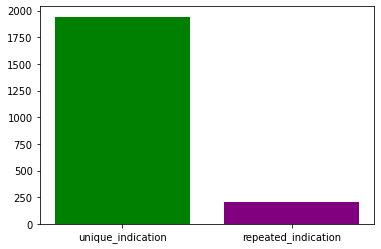

In [ ]:
import matplotlib.pyplot as plt
indication_reports=pd.Series(report_df["indication"].tolist())
len_indication=len(indication_reports)
unique_indication_report=len(np.unique(indication_reports))
print("no. of unique indication report in the dataset:{}".format(unique_indication_report))
repeated_indication_report=np.sum(indication_reports.value_counts()>1)
print("No. of indication report repeated more than one times:{}".format(repeated_indication_report))
plt.bar(["unique_indication"], unique_indication_report, color='green')
plt.bar(["repeated_indication"], repeated_indication_report, color='purple' )



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


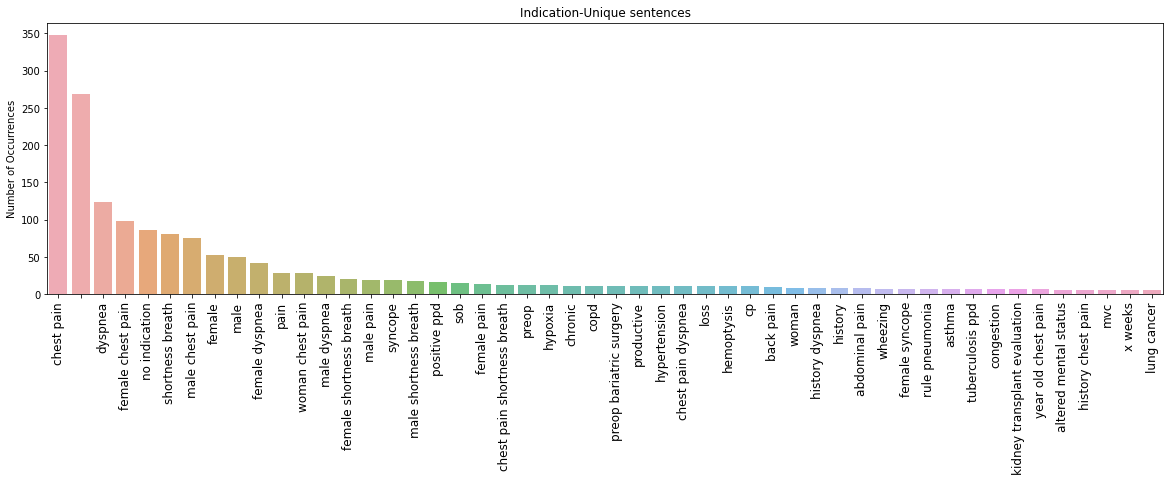

In [16]:
import seaborn as sns

#Plotting top 50 frequent sentences of Indication feature
sentences = report_df['indication'].value_counts()[:50]
plt.figure(figsize=(20,5))
sns.barplot(sentences.index, sentences.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=10)
plt.xticks(fontsize='large',rotation=90)
plt.title("Indication-Unique sentences")
plt.show()

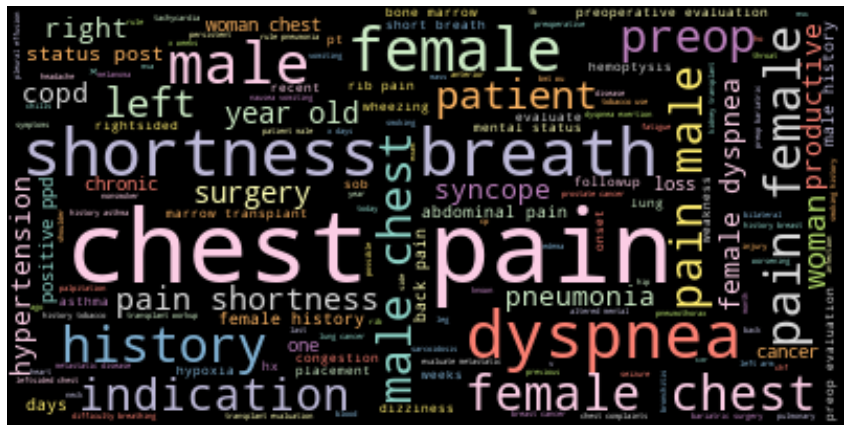

In [17]:
from wordcloud import WordCloud 

wordcloud = WordCloud(max_words=500, background_color="black", colormap="Set3").generate(' '.join(report_df['indication'].astype(str)))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.show()

no. of unique findings report in the dataset:2520
No. of findings report repeated more than one times:148


<BarContainer object of 1 artists>

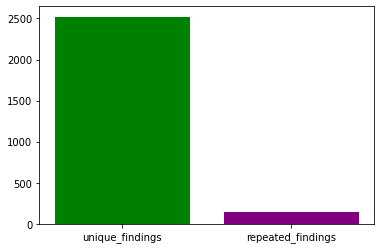

In [18]:
findings_reports=pd.Series(report_df["findings"].tolist())
len_findings=len(findings_reports)
unique_findings_report=len(np.unique(findings_reports))
print("no. of unique findings report in the dataset:{}".format(unique_findings_report))
repeated_findings_report=np.sum(findings_reports.value_counts()>1)
print("No. of findings report repeated more than one times:{}".format(repeated_findings_report))
plt.bar(["unique_findings"], unique_findings_report, color='green')
plt.bar(["repeated_findings"], repeated_findings_report, color='purple' )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


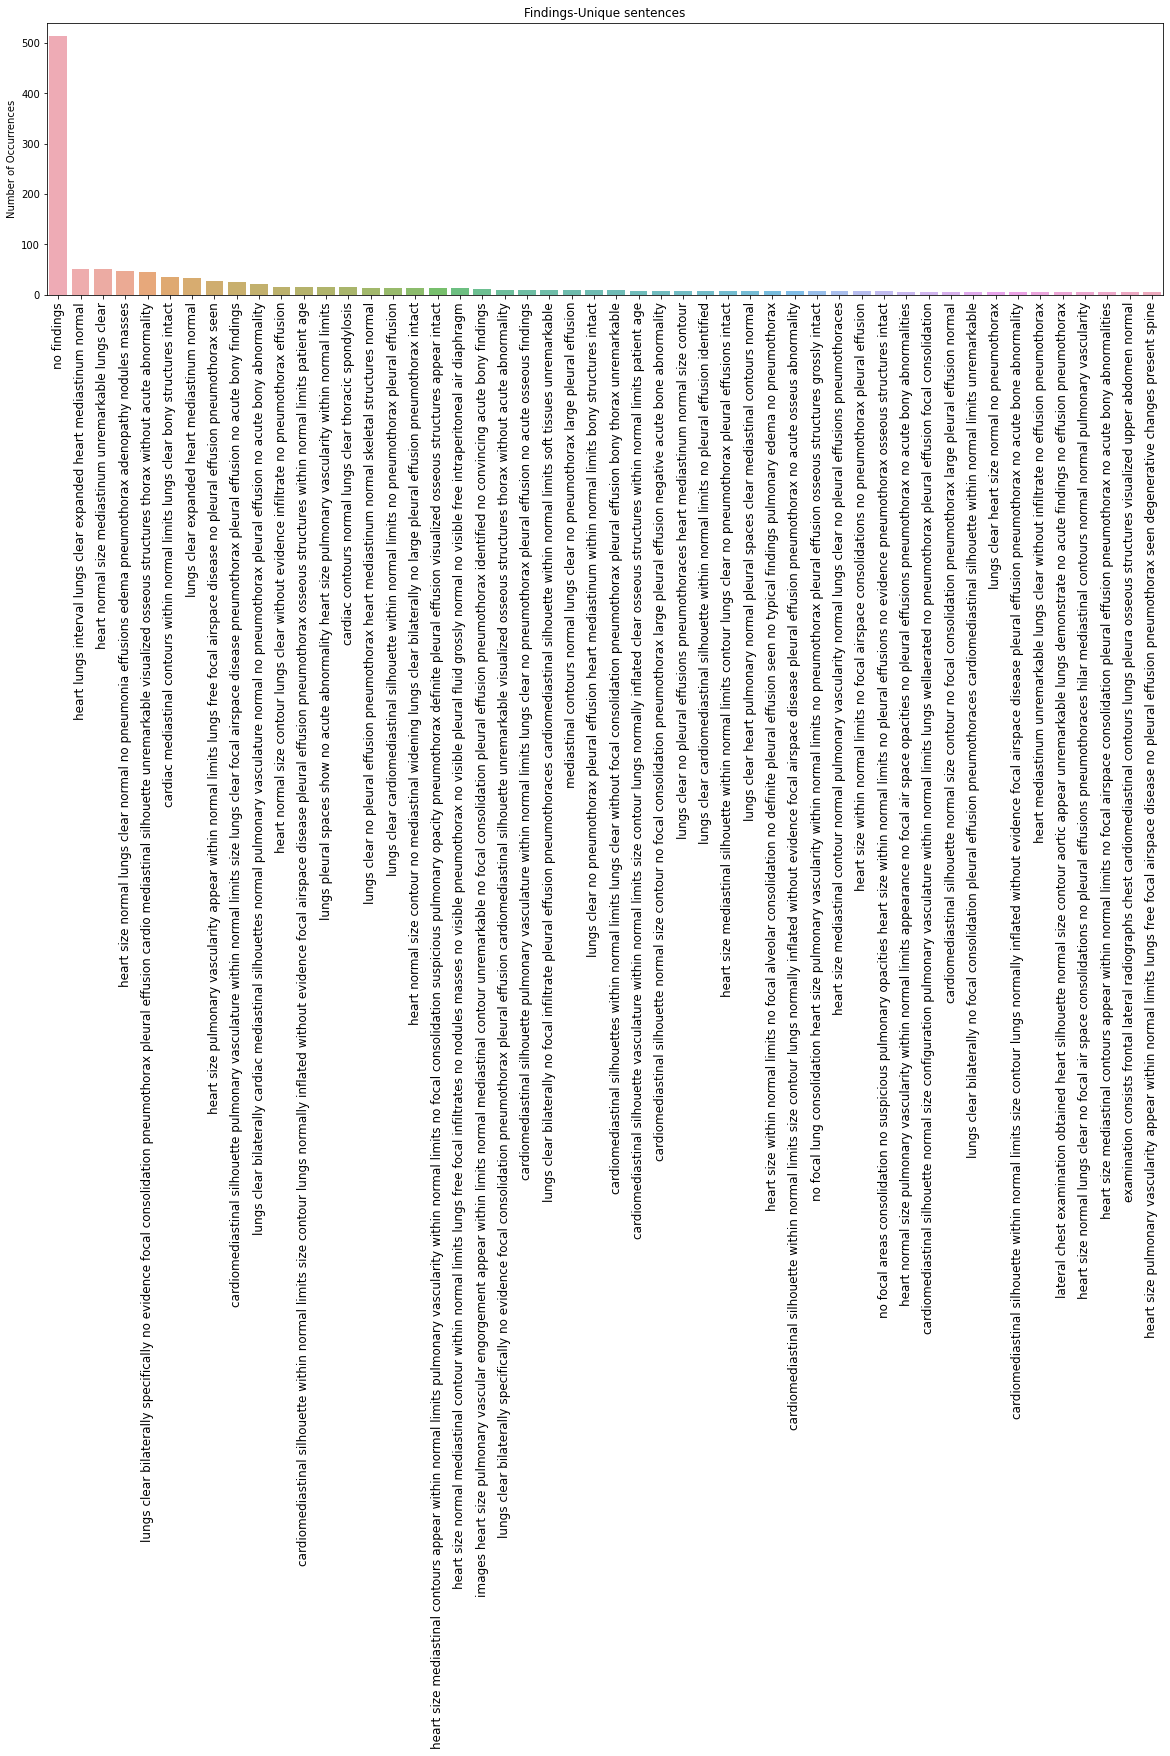

In [19]:
#Plotting top 50 frequent sentences of Findings feature
sentences = report_df['findings'].value_counts()[:50]
plt.figure(figsize=(20,5))
sns.barplot(sentences.index, sentences.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=10)
plt.xticks(fontsize='large',rotation=90)
plt.title("Findings-Unique sentences")
plt.show()

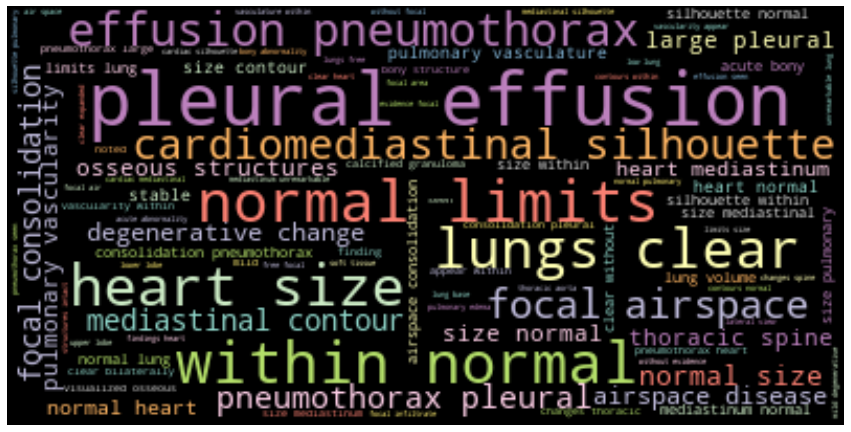

In [20]:

wordcloud = WordCloud(max_words=500, background_color="black", colormap="Set3").generate(' '.join(report_df['findings'].astype(str)))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.show()

no. of unique impression report in the dataset:1674
No. of impression report repeated more than one times:118


<BarContainer object of 1 artists>

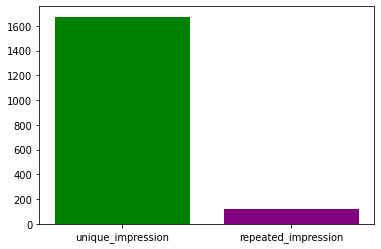

In [21]:
impression_reports=pd.Series(report_df["impression"].tolist())
len_impression=len(impression_reports)
unique_impression_report=len(np.unique(impression_reports))
print("no. of unique impression report in the dataset:{}".format(unique_impression_report))
repeated_impression_report=np.sum(impression_reports.value_counts()>1)
print("No. of impression report repeated more than one times:{}".format(repeated_impression_report))
plt.bar(["unique_impression"], unique_impression_report, color='green')
plt.bar(["repeated_impression"], repeated_impression_report, color='purple' )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


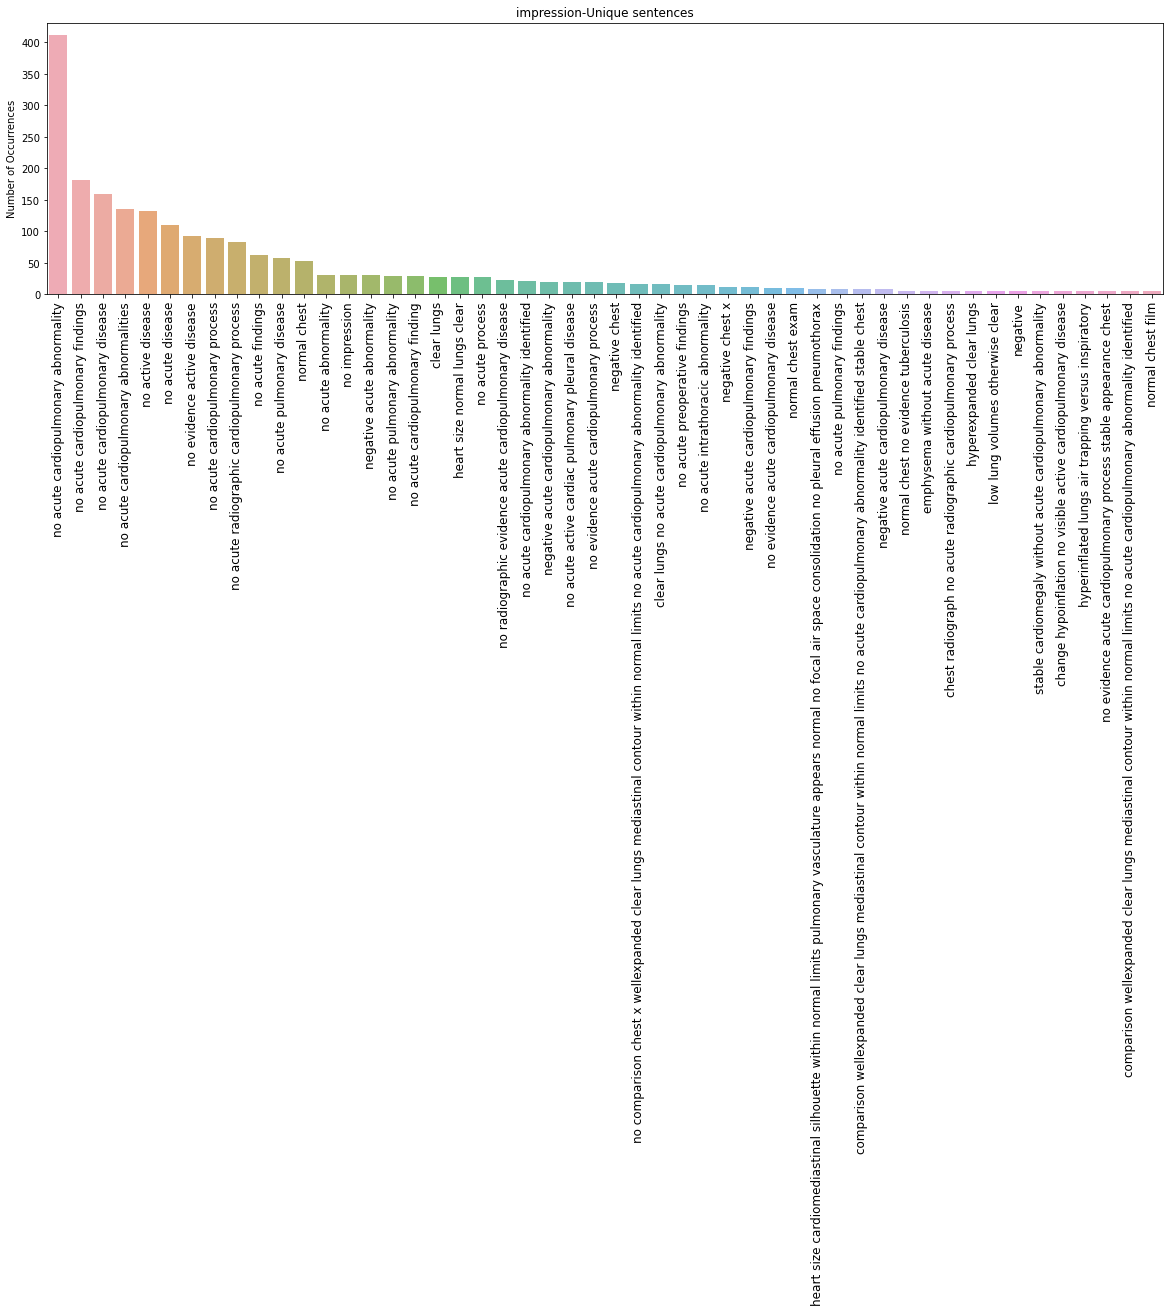

In [22]:
#Plotting top 50 frequent sentences of Indication feature
sentences = report_df['impression'].value_counts()[:50]
plt.figure(figsize=(20,5))
sns.barplot(sentences.index, sentences.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=10)
plt.xticks(fontsize='large',rotation=90)
plt.title("impression-Unique sentences")
plt.show()

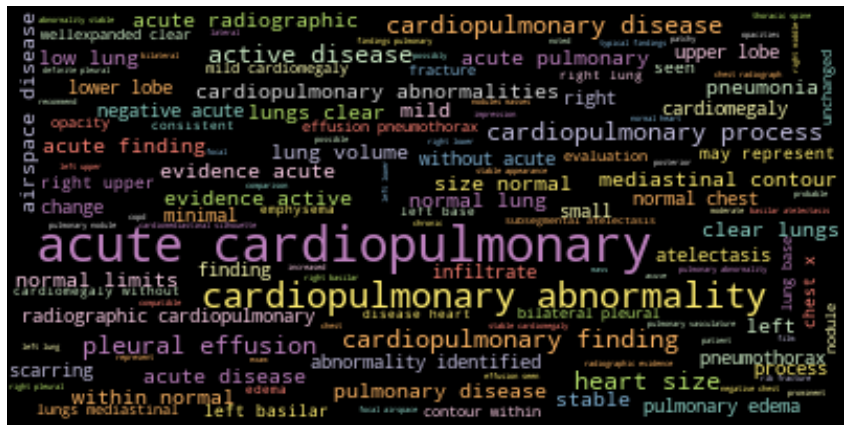

In [23]:

wordcloud = WordCloud(max_words=400, background_color="black", colormap="Set3").generate(' '.join(report_df['impression'].astype(str)))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.show()

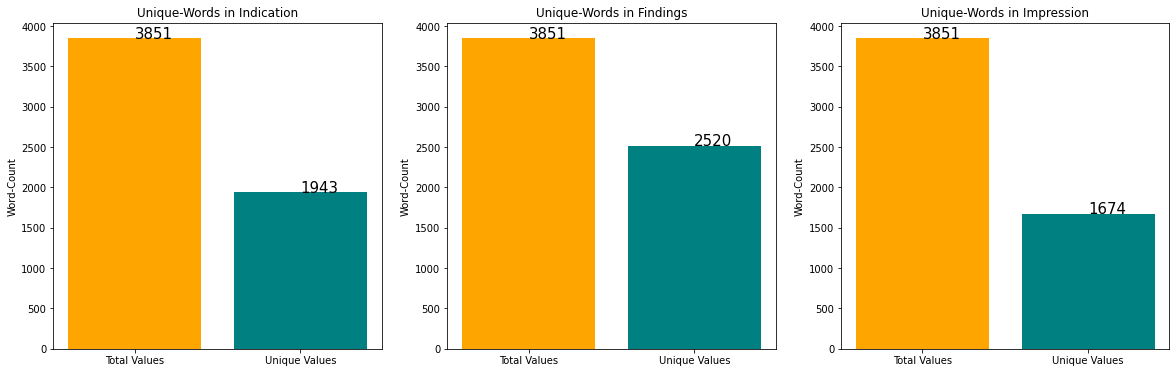

In [28]:
def unique_words_features(df):
    '''This function takes pandas dataframe and show barplot of features unique and repeated words 
       Input  =  pandas dataframe or numpy arrays
       Output =  barplot of the unique words of dataframe '''

    #length of the feature
    len_total = len(df.tolist())

    #length of unique words in the featue
    len_unique = len(np.unique(df.tolist()))

    x = ['Total Values', 'Unique Values']
    y =  [len_total, len_unique]

    plt.bar(x,y,color = ['orange','Teal'])
    plt.ylabel('Word-Count')
    for index,data in enumerate(y):
        plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=15))
    
    plt.ylabel('Word-Count')

plt.figure(figsize = (20,6))
plt.subplot(131)
unique_words_features(report_df['indication'])
plt.title('Unique-Words in Indication')
plt.subplot(132)
unique_words_features(report_df['findings'])
plt.title('Unique-Words in Findings')
plt.subplot(133)
unique_words_features(report_df['impression'])
plt.title('Unique-Words in Impression')
plt.show()

In [30]:
report_df['indication_count'] = report_df['indication'].astype(str).str.split().apply(lambda x: 0 if x==None else len(x))
report_df['findings_count'] = report_df['findings'].astype(str).str.split().apply(lambda x: 0 if x==None else len(x))
report_df['impression_count'] = report_df['impression'].astype(str).str.split().apply(lambda x: 0 if x==None else len(x))
report_df.head()

,uid,MeSH,Problems,image,indication,comparison,findings,impression,indication_count,findings_count,impression_count
0,1,normal,normal,xray chest pa lateral,positive tb test,none,cardiac silhouette mediastinum size within nor...,normal chest x,3,19,3
1,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,chest views frontal lateral,preop bariatric surgery,none,borderline cardiomegaly midline sternotomy enl...,no acute pulmonary findings,3,10,4
2,3,normal,normal,xray chest pa lateral,rib pain steps pain r back r elbow r rib no pr...,no comparison,no findings,no displaced rib fractures pneumothorax pleura...,19,2,21
3,4,"Pulmonary Disease, Chronic Obstructive;Bullous...","Pulmonary Disease, Chronic Obstructive;Bullous...",pa lateral views chest hours,,none available,diffuse bilateral interstitial alveolar opacit...,bullous emphysema interstitial fibrosis probab...,0,40,33
4,5,Osteophyte/thoracic vertebrae/multiple/small;T...,Osteophyte;Thickening;Lung,xray chest pa lateral,chest nasal congestion,no comparison,cardiomediastinal silhouette pulmonary vascula...,no acute cardiopulmonary abnormality,3,29,4


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


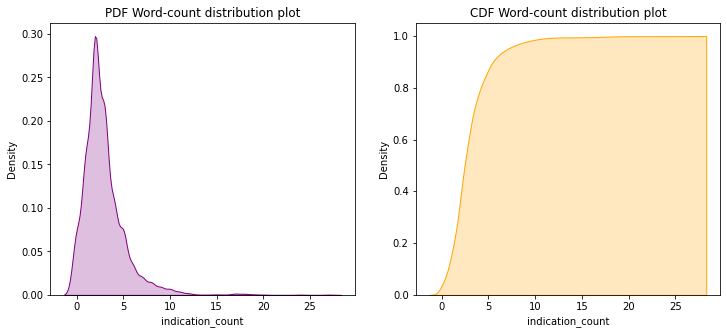

In [38]:
plt.figure(figsize = (12,5))
# Seaborn PDF
plt.subplot(121)
sns.kdeplot(report_df['indication_count'],shade=True,color='purple')
plt.title("PDF Word-count distribution plot")
plt.subplot(122)
# Seaborn CDF
sns.distplot(report_df['indication_count'], kde_kws={'cumulative': True,'shade': True}, hist=False,color='orange')
plt.title("CDF Word-count distribution plot")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


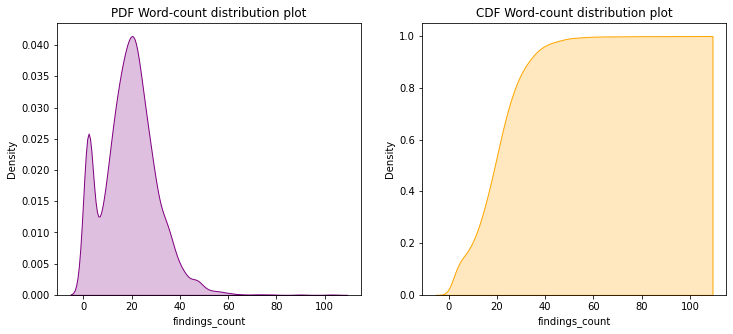

In [40]:
plt.figure(figsize = (12,5))
# Seaborn PDF
plt.subplot(121)
sns.kdeplot(report_df['findings_count'],shade=True,color='purple')
plt.title("PDF Word-count distribution plot")
plt.subplot(122)
# Seaborn CDF
sns.distplot(report_df['findings_count'], kde_kws={'cumulative': True,'shade': True}, hist=False,color='orange')
plt.title("CDF Word-count distribution plot")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


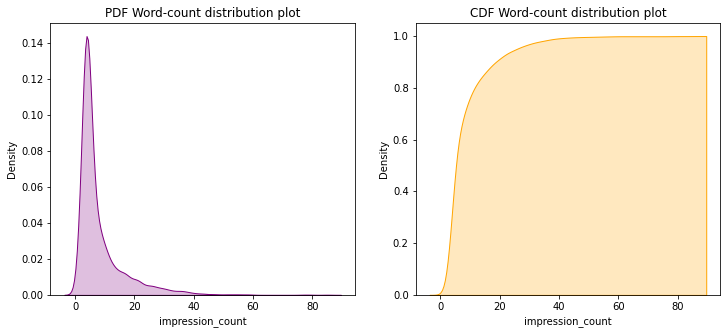

In [39]:
plt.figure(figsize = (12,5))
# Seaborn PDF
plt.subplot(121)
sns.kdeplot(report_df['impression_count'],shade=True,color='purple')
plt.title("PDF Word-count distribution plot")
plt.subplot(122)
# Seaborn CDF
sns.distplot(report_df['impression_count'], kde_kws={'cumulative': True,'shade': True}, hist=False,color='orange')
plt.title("CDF Word-count distribution plot")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of words')

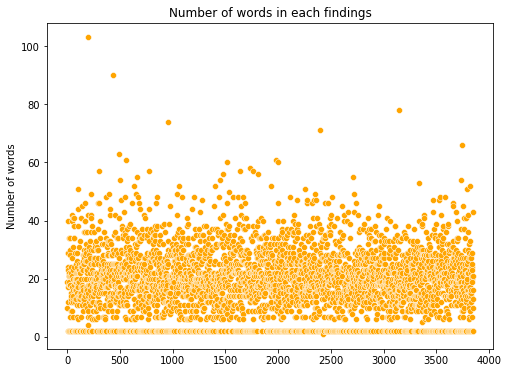

In [62]:
plt.figure(figsize = (8,6))
l = [len(e.split()) for e in report_df['findings'].values]
plt.title('Number of words in each findings')
sns.scatterplot(range(report_df.shape[0]),l, color='orange')
plt.ylabel('Number of words')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of words')

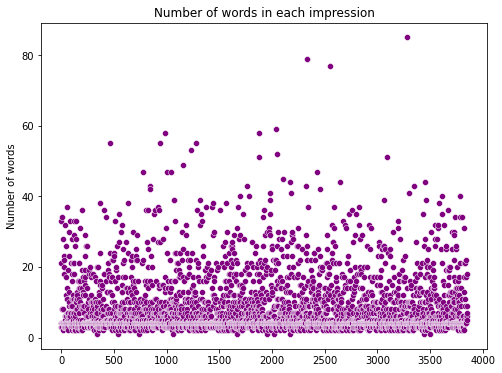

In [63]:
plt.figure(figsize = (8,6))
l = [len(e.split()) for e in report_df['impression'].values]
plt.title('Number of words in each impression')
sns.scatterplot(range(report_df.shape[0]),l, color='purple')
plt.ylabel('Number of words')




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of words')

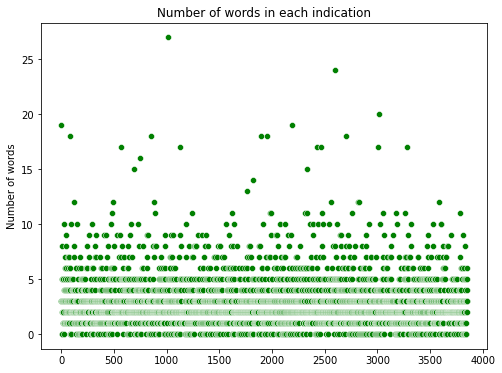

In [64]:
plt.figure(figsize = (8,6))
l = [len(e.split()) for e in report_df['indication'].values]
plt.title('Number of words in each indication')
sns.scatterplot(range(report_df.shape[0]),l, color='green')
plt.ylabel('Number of words')